In [ ]:

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.callbacks import ModelCheckpoint
from PIL import ImageFile
import os
import tensorflow as tf

# Allow truncated images to load
ImageFile.LOAD_TRUNCATED_IMAGES = True

# Enable mixed precision if supported by the hardware (FP16 precision for faster computation)
tf.keras.mixed_precision.set_global_policy('mixed_float16')

# Data preparation (Increased batch size for faster processing)
train_datagen = ImageDataGenerator(rescale=1.0/255)
test_datagen = ImageDataGenerator(rescale=1.0/255)

train_path = 'C:/Dataset/dataset/dataset/train'
test_path = 'C:/Dataset/dataset/dataset/test'

# Loading the data with ImageDataGenerator
traindata = train_datagen.flow_from_directory(
    train_path,
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical',
    shuffle=True,
    seed=42
)

testdata = test_datagen.flow_from_directory(
    test_path,
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical',
    shuffle=True,
    seed=42
)

class_indices = traindata.class_indices
num_classes = len(class_indices)

# Model definition
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(num_classes, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Create a directory for saving models if it doesn't exist
os.makedirs("saved_models", exist_ok=True)

# Auto-save checkpoint after each epoch (and save the best model as well)
checkpoint = ModelCheckpoint(
    filepath='saved_models/model_epoch_{epoch:02d}.keras',
    save_freq='epoch',
    save_best_only=False,
    verbose=1
)

# Train the model with checkpoint callback (no validation)
model.fit(
    traindata,
    epochs=60,
    steps_per_epoch=traindata.samples // traindata.batch_size,
    callbacks=[checkpoint]  # Save models after each epoch
)

print("✅ Model training completed. Models saved after each epoch in 'saved_models' folder.")


Found 121852 images belonging to 975 classes.
Found 121851 images belonging to 975 classes.


C:\Users\Krish\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
C:\Users\Krish\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
C:\Users\Krish\AppData\Local\Programs\Python\Python311\Lib\site-packages\PIL\Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Epoch 1/60
3807/3807 ━━━━━━━━━━━━━━━━━━━━ 0s 708ms/step - accuracy: 0.0920 - loss: 5.8603
Epoch 1: saving model to saved_models/model_epoch_01.keras
3807/3807 ━━━━━━━━━━━━━━━━━━━━ 2697s 708ms/step - accuracy: 0.0920 - loss: 5.8602
Epoch 2/60
   1/3807 ━━━━━━━━━━━━━━━━━━━━ 39:35 624ms/step - accuracy: 0.0625 - loss: 5.7404
Epoch 2: saving model to saved_models/model_epoch_02.keras
3807/3807 ━━━━━━━━━━━━━━━━━━━━ 1s 42us/step - accuracy: 0.0625 - loss: 5.7404    
Epoch 3/60


C:\Users\Krish\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


3807/3807 ━━━━━━━━━━━━━━━━━━━━ 0s 725ms/step - accuracy: 0.2116 - loss: 4.5985
Epoch 3: saving model to saved_models/model_epoch_03.keras
3807/3807 ━━━━━━━━━━━━━━━━━━━━ 2759s 725ms/step - accuracy: 0.2116 - loss: 4.5985
Epoch 4/60
   1/3807 ━━━━━━━━━━━━━━━━━━━━ 42:09 665ms/step - accuracy: 0.3438 - loss: 3.8314
Epoch 4: saving model to saved_models/model_epoch_04.keras
3807/3807 ━━━━━━━━━━━━━━━━━━━━ 1s 35us/step - accuracy: 0.3438 - loss: 3.8314    
Epoch 5/60
3807/3807 ━━━━━━━━━━━━━━━━━━━━ 0s 704ms/step - accuracy: 0.2642 - loss: 4.0475
Epoch 5: saving model to saved_models/model_epoch_05.keras
3807/3807 ━━━━━━━━━━━━━━━━━━━━ 2681s 704ms/step - accuracy: 0.2642 - loss: 4.0475
Epoch 6/60
   1/3807 ━━━━━━━━━━━━━━━━━━━━ 41:49 659ms/step - accuracy: 0.2500 - loss: 4.1821
Epoch 6: saving model to saved_models/model_epoch_06.keras
3807/3807 ━━━━━━━━━━━━━━━━━━━━ 1s 42us/step - accuracy: 0.2500 - loss: 4.1821    
Epoch 7/60
3807/3807 ━━━━━━━━━━━━━━━━━━━━ 0s 671ms/step - accuracy: 0.3069 - loss

KeyboardInterrupt: 

[]

In [ ]:
# Save the model in .keras format
model.save('my_model.keras')
print("Model saved as my_model.keras")

Model saved as my_model.keras


In [ ]:
from tensorflow.keras.models import load_model

# Load the model from the .keras file
model = load_model('my_model.keras')
print("Model loaded from my_model.keras")

Model loaded from my_model.keras


Model loaded successfully!
Found 121852 images belonging to 975 classes.
Class Labels: ['Abiu', "Abrus_precatorius_(Crab's_Eye)", 'Abrus_precatorius_(Rosary_Pea)', 'Acai_Seed', 'Acerola_Cherry', 'Aconite_(Monkshood)', 'Acorn', 'Acorus_Calamus_(Sweet_Flag)', 'Actaea_pachypoda_(White_Baneberry)', 'Adzuki_Bean', 'Aesculus_(Horse_Chestnut)', 'African_Breadfruit', 'Agave_americana_(Century_Plant)', 'Ageratina_altissima_(White_Snakeroot)', 'Ageratum', 'Agrimony', 'Ajwain', 'Aleurites_moluccanus_(Candlenut_Tree)', 'Alfalfa', 'Allamanda_(Golden_Trumpet)', 'Allspice', 'Almond', 'Aloe_Vera', 'Aloe_Vera_Seed', 'Alstroemeria', 'Amalaki', 'Amaranth', 'Amaranthus_(Pigweed)', 'Amaryllis', 'Andrographis', 'Anemone', 'Angelica', 'Angelonia', 'Angel’s_Trumpet_Seed', 'Anise', 'Anthurium_(Flamingo_Flower)', 'Apocynum_(Dogbane)', 'Apple', 'Apple_Seed', 'Apricot', 'Apricot_Seed', 'Aprium', 'Arazá', 'Arisaema_triphyllum_(Jack-in-the-Pulpit)', 'Aristolochia_(Birthwort)', 'Arnica', 'Aronia_Berry', 'Arrowroot',

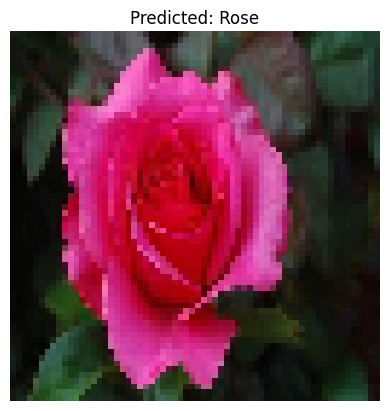

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import matplotlib.pyplot as plt

# Load the saved model
model = load_model('./saved_models/model_epoch_36.keras')
print("Model loaded successfully!")

# Recreate ImageDataGenerator for training data
train_datagen = ImageDataGenerator(rescale=1.0/255)

# Define training data path (same as used during training)
train_path = 'C:/Dataset/dataset/dataset/train'

# Recreate `traindata` to get class labels
traindata = train_datagen.flow_from_directory(
    train_path,
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical'
)

# Retrieve class labels
class_labels = list(traindata.class_indices.keys())
print(f"Class Labels: {class_labels}")

# Ensure model output matches dataset classes
if model.output_shape[1] != len(class_labels):
    print(f"Warning: Model expects {model.output_shape[1]} classes, but dataset has {len(class_labels)}.")

# Load and preprocess an image for prediction
img_path = r"C:\Dataset\dataset\dataset\test\Rose\Rose_79.jpg"
img = load_img(img_path, target_size=(64, 64))
img_array = img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

# Make prediction
prediction = model.predict(img_array)
predicted_class_index = np.argmax(prediction, axis=1)[0]

# Ensure predicted index is within range
if predicted_class_index >= len(class_labels):
    print(f"Error: Predicted index {predicted_class_index} is out of range!")
else:
    predicted_class_label = class_labels[predicted_class_index]
    print(f"Predicted Class Label: {predicted_class_label}")

# Print result
print(f"Predicted Class Index: {predicted_class_index}")
print(f"Predicted Class Label: {predicted_class_label}")

# Display the image with the prediction
plt.imshow(img)
plt.title(f"Predicted: {predicted_class_label}")
plt.axis("off")
plt.show()


Model loaded successfully!
Found 121852 images belonging to 975 classes.
Class Labels: ['Abiu', "Abrus_precatorius_(Crab's_Eye)", 'Abrus_precatorius_(Rosary_Pea)', 'Acai_Seed', 'Acerola_Cherry', 'Aconite_(Monkshood)', 'Acorn', 'Acorus_Calamus_(Sweet_Flag)', 'Actaea_pachypoda_(White_Baneberry)', 'Adzuki_Bean', 'Aesculus_(Horse_Chestnut)', 'African_Breadfruit', 'Agave_americana_(Century_Plant)', 'Ageratina_altissima_(White_Snakeroot)', 'Ageratum', 'Agrimony', 'Ajwain', 'Aleurites_moluccanus_(Candlenut_Tree)', 'Alfalfa', 'Allamanda_(Golden_Trumpet)', 'Allspice', 'Almond', 'Aloe_Vera', 'Aloe_Vera_Seed', 'Alstroemeria', 'Amalaki', 'Amaranth', 'Amaranthus_(Pigweed)', 'Amaryllis', 'Andrographis', 'Anemone', 'Angelica', 'Angelonia', 'Angel’s_Trumpet_Seed', 'Anise', 'Anthurium_(Flamingo_Flower)', 'Apocynum_(Dogbane)', 'Apple', 'Apple_Seed', 'Apricot', 'Apricot_Seed', 'Aprium', 'Arazá', 'Arisaema_triphyllum_(Jack-in-the-Pulpit)', 'Aristolochia_(Birthwort)', 'Arnica', 'Aronia_Berry', 'Arrowroot',

C:\Users\Krish\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


  11/3808 ━━━━━━━━━━━━━━━━━━━━ 21:12 335ms/step

C:\Users\Krish\AppData\Local\Programs\Python\Python311\Lib\site-packages\PIL\Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


3808/3808 ━━━━━━━━━━━━━━━━━━━━ 909s 239ms/step


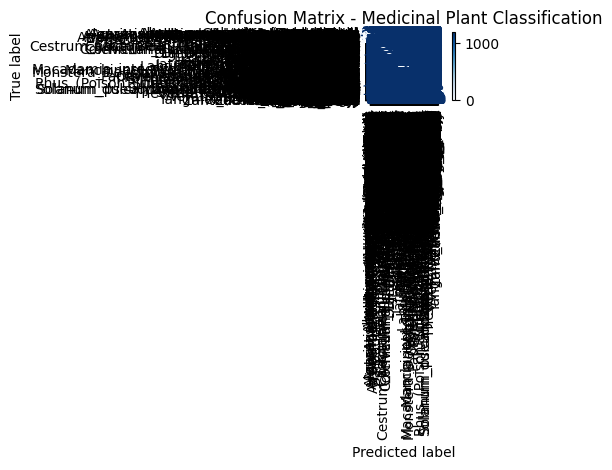

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

# Load the saved model
model = load_model('my_model.keras')
print("Model loaded successfully!")

# Paths
train_path = 'C:/Dataset/dataset/dataset/train'
test_path = 'C:/Dataset/dataset/dataset/test'

# Prepare data generators
datagen = ImageDataGenerator(rescale=1.0/255)

# Get class labels from train data (same as training time)
traindata = datagen.flow_from_directory(
    train_path,
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical'
)
class_labels = list(traindata.class_indices.keys())
print(f"Class Labels: {class_labels}")

# Load test data
testdata = datagen.flow_from_directory(
    test_path,
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical',
    shuffle=False  # Important for confusion matrix
)

# Predict the classes
y_pred_probs = model.predict(testdata)
y_pred = np.argmax(y_pred_probs, axis=1)

# Get true labels
y_true = testdata.classes  # Already in integer format

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)
disp.plot(cmap=plt.cm.Blues, xticks_rotation=90)
plt.title("Confusion Matrix - Medicinal Plant Classification")
plt.tight_layout()
plt.show()


In [ ]:
from flask import Flask, request, jsonify
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import img_to_array, load_img
import numpy as np
import os
from werkzeug.utils import secure_filename
import traceback
import pandas as pd

app = Flask(__name__)

UPLOAD_FOLDER = os.path.join(os.getcwd(), "uploads")
os.makedirs(UPLOAD_FOLDER, exist_ok=True)

train_path = r"C:\Dataset\dataset\dataset\train"
class_labels = sorted([d for d in os.listdir(train_path) if os.path.isdir(os.path.join(train_path, d))])

print(f"Total classes found: {len(class_labels)}")
print(f"Example classes: {class_labels[:10]}")

model_path = "./saved_models/model_epoch_36.keras"
if not os.path.exists(model_path):
    raise FileNotFoundError(f"Model file '{model_path}' not found.")
model = load_model(model_path)

csv_path = r"C:\Dataset\Description.csv"
if not os.path.exists(csv_path):
    raise FileNotFoundError(f"CSV file '{csv_path}' not found.")

try:
    dataset = pd.read_csv(csv_path, encoding="utf-8", on_bad_lines="skip")
except Exception as e:
    raise Exception(f"Error reading CSV file: {str(e)}")

@app.route('/predict', methods=['POST'])
def predict():
    try:
        if 'file' not in request.files:
            return jsonify({"error": "No file provided"}), 400

        file = request.files['file']
        filename = secure_filename(file.filename)

        file_path = os.path.join(UPLOAD_FOLDER, filename)
        file.save(file_path)

        img = load_img(file_path, target_size=(64, 64))
        img_array = img_to_array(img) / 255.0
        img_array = np.expand_dims(img_array, axis=0)

        prediction = model.predict(img_array)
        predicted_class_index = np.argmax(prediction, axis=1)[0]

        if 0 <= predicted_class_index < len(class_labels):
            predicted_class_label = class_labels[predicted_class_index]
        else:
            return jsonify({"error": "Prediction index out of range"}), 500

        row = dataset[dataset["Name"] == predicted_class_label]
        if row.empty:
            return jsonify({"error": "No details found for predicted class"}), 404

        # ✅ Extract all relevant details
        benefits = str(row.iloc[0]["Benefits"])
        consumption_methods = str(row.iloc[0]["Consumption Methods"])
        how_to_eat = str(row.iloc[0]["How to Eat"])

        return jsonify({
            "predicted_class": predicted_class_label,
            "benefits": benefits,
            "consumption_methods": consumption_methods,
            "how_to_eat": how_to_eat
        })

    except FileNotFoundError as e:
        return jsonify({"error": str(e)}), 404
    except Exception as e:
        traceback.print_exc()
        return jsonify({"error": str(e)}), 500

if __name__ == '__main__':
    app.run(host="0.0.0.0", port=5003, debug=False)


Total classes found: 975
Example classes: ['Abiu', "Abrus_precatorius_(Crab's_Eye)", 'Abrus_precatorius_(Rosary_Pea)', 'Acai_Seed', 'Acerola_Cherry', 'Aconite_(Monkshood)', 'Acorn', 'Acorus_Calamus_(Sweet_Flag)', 'Actaea_pachypoda_(White_Baneberry)', 'Adzuki_Bean']
 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on all addresses (0.0.0.0)
 * Running on http://127.0.0.1:5003
 * Running on http://192.168.127.24:5003
Press CTRL+C to quit
